In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

pima = pd.read_csv("C:/Users/DELL/Downloads/diabetes.csv")


In [29]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]
y = pima['Outcome']

In [33]:
print(X_train.head())
print(X_train.dtypes)


     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
695            7      480  30.4   43      142             90   
119            4       51  23.2   21       99             76   
135            2      140  33.8   31      125             60   
675            6        0  30.9   31      195             70   
326            1      156  35.1   30      122             64   

     DiabetesPedigreeFunction  
695                     0.128  
119                     0.223  
135                     0.088  
675                     0.328  
326                     0.692  
Pregnancies                   int64
Insulin                       int64
BMI                         float64
Age                           int64
Glucose                       int64
BloodPressure                 int64
DiabetesPedigreeFunction    float64
dtype: object


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [35]:
logreg = LogisticRegression(max_iter=1000, random_state=16)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
print("Model trained and predictions made successfully!")

Model trained and predictions made successfully!


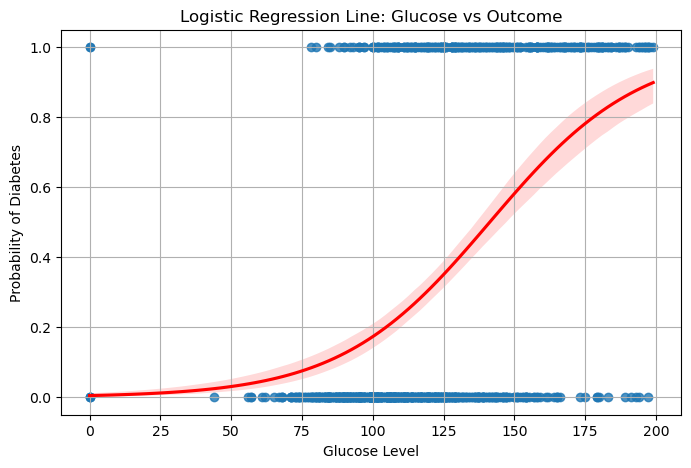

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.regplot(x='Glucose', y='Outcome', data=pima, logistic=True, line_kws={"color":"red"})
plt.title("Logistic Regression Line: Glucose vs Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Probability of Diabetes")
plt.grid(True)
plt.show()

In [40]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

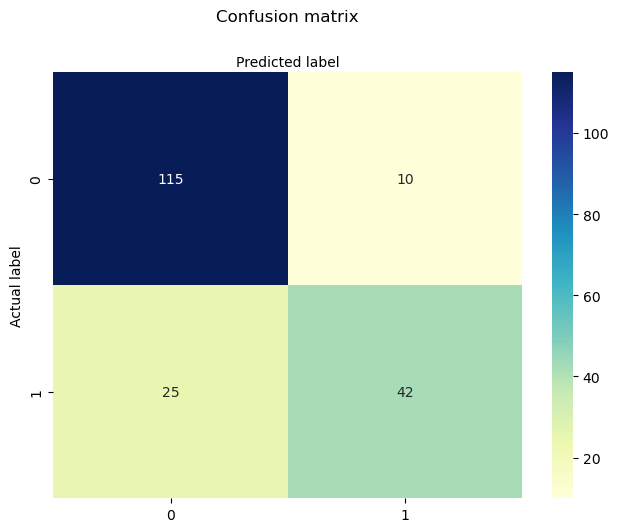

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [43]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192

